In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.stats import pearsonr

In [2]:
plt.style.use('ggplot')

## load co2 data

- CO2 emissions in millions of tons

In [3]:
co2 = pd.read_excel("../data/bp-stats-review-2019-all-data.xlsx", "Carbon Dioxide Emissions", header=2)

In [4]:
co2.rename(columns={"Million tonnes of carbon dioxide":"country"}, inplace=True)

In [5]:
co2 = co2.loc[~(co2["country"].isnull() | co2["country"].str.contains("Total") | co2["country"].str.contains("OECD"))]

In [6]:
co2 = co2.set_index("country")
co2 = co2.stack().rename("co2").reset_index().rename(columns={"level_1":"year"})
co2 = co2.loc[co2["year"].astype(str).str.len() == 4]

In [7]:
co2.loc[:, "year"] = pd.to_numeric(co2.loc[:,"year"])
co2.loc[:, "co2"] = pd.to_numeric(co2.loc[:,"co2"])

In [8]:
co2.head()

,country,year,co2
0,Canada,1965,259.855545
1,Canada,1966,271.067865
2,Canada,1967,284.905440
3,Canada,1968,307.276993
4,Canada,1969,319.226620


## load energy data

- data contains the total energy consumption for each country per year in mtoe (millions tons of oil equivalent). this includes all energy sources

In [9]:
energy = pd.read_excel("../data/bp-stats-review-2019-all-data.xlsx", "Primary Energy Consumption", header=2)

In [10]:
energy.rename(columns={"Million tonnes oil equivalent":"country"}, inplace=True)

In [11]:
energy = energy.loc[~(energy["country"].isnull() | energy["country"].str.contains("Total") | energy["country"].str.contains("OECD"))]

In [12]:
energy = energy.set_index("country")
energy = energy.stack().rename("mtoe").reset_index().rename(columns={"level_1":"year"})
energy = energy.loc[energy["year"].astype(str).str.len() == 4]

In [13]:
energy.loc[:, "year"] = pd.to_numeric(energy.loc[:,"year"])
energy.loc[:, "mtoe"] = pd.to_numeric(energy.loc[:,"mtoe"])

In [14]:
energy.head()

,country,year,mtoe
0,Canada,1965,115.910849
1,Canada,1966,122.991657
2,Canada,1967,129.026541
3,Canada,1968,137.695457
4,Canada,1969,145.303023


### nuclear

- this is the amount of energy consumed that was from nuclear sources in mtoe (millions tons of oil equivalent)

In [15]:
nuc = pd.read_excel("../data/bp-stats-review-2019-all-data.xlsx", "Nuclear Consumption - Mtoe", header=2)

In [16]:
nuc.rename(columns={"Million tonnes oil equivalent":"country"}, inplace=True)

nuc = nuc.loc[~(nuc["country"].isnull() | nuc["country"].str.contains("Total") | nuc["country"].str.contains("OECD"))]

nuc = nuc.set_index("country")
nuc = nuc.stack().rename("mtoe").reset_index().rename(columns={"level_1":"year"})
nuc = nuc.loc[nuc["year"].astype(str).str.len() == 4]

nuc.loc[:, "year"] = pd.to_numeric(nuc.loc[:,"year"])
nuc.loc[:, "mtoe"] = pd.to_numeric(nuc.loc[:,"mtoe"])
nuc.rename(columns={"mtoe": "nuclear"}, inplace=True)
nuc.head()

,country,year,nuclear
0,Canada,1965,0.028963
1,Canada,1966,0.038919
2,Canada,1967,0.034620
3,Canada,1968,0.207721
4,Canada,1969,0.119700


## renewables

- amount of energy consumed from renewable sources in mtoe

In [17]:
renew = pd.read_excel("../data/bp-stats-review-2019-all-data.xlsx", "Renewables - Mtoe", header=2)

In [18]:
renew.rename(columns={"Million tonnes oil equivalent":"country"}, inplace=True)

In [19]:
renew = renew.loc[~(renew["country"].isnull() | co2["country"].str.contains("Total") | co2["country"].str.contains("OECD"))]

In [20]:
renew = renew.set_index("country")
renew = renew.stack().rename("mtoe").reset_index().rename(columns={"level_1":"year"})
renew = renew.loc[renew["year"].astype(str).str.len() == 4]

In [21]:
renew.loc[:, "year"] = pd.to_numeric(renew.loc[:,"year"])
renew.loc[:, "mtoe"] = pd.to_numeric(renew.loc[:,"mtoe"])
renew.rename(columns={"mtoe":"renewables"}, inplace=True)

In [22]:
renew = renew.merge(nuc, left_on=["country", "year"], right_on=["country", "year"])

In [23]:
energy = energy.merge(renew, left_on=["country", "year"], right_on=["country", "year"])

## shape data

- load in shape file data for each country and clean the country names in order to merge datasets.

In [24]:
df = co2.merge(energy, left_on=["country", "year"], right_on=["country", "year"])

In [25]:
df["country"] = df["country"].replace({"US": "United States", "Iran": "Iran (Islamic Republic of)",
                                       "South Korea": "Korea, Republic of", "China Hong Kong SAR": "Hong Kong",
                                       "Trinidad & Tobago": "Trinidad and Tobago", "Vietnam": "Viet Nam",
                                       "Russian Federation": "Russia"
                                      })

In [26]:
# df["renew_ratio"] = (df["renewables"] + df["nuclear"]) / df["mtoe"]
df["renew_ratio"] = (df["renewables"]) / df["mtoe"]

df["emission_ratio"] = df["co2"]/df["mtoe"]

In [27]:
df.head()

,country,year,co2,mtoe,renewables,nuclear,renew_ratio,emission_ratio
0,Canada,1965,259.855545,115.910849,0.0,0.028963,0.0,2.241857
1,Canada,1966,271.067865,122.991657,0.0,0.038919,0.0,2.203953
2,Canada,1967,284.905440,129.026541,0.0,0.034620,0.0,2.208115
3,Canada,1968,307.276993,137.695457,0.0,0.207721,0.0,2.231570
4,Canada,1969,319.226620,145.303023,0.0,0.119700,0.0,2.196972


In [1]:
countries = gpd.read_file("../data/shape_files/TM_WORLD_BORDERS-0.3.shp")

NameError: name 'gpd' is not defined

In [29]:
df.loc[~df["country"].isin(countries["NAME"])]["country"].value_counts()

Other Europe                         54
Other Middle East                    54
Other Northern Africa                54
                 European Union #    54
Other Caribbean                      54
Western Africa                       54
Middle Africa                        54
Other Asia Pacific                   54
Central America                      54
Other South America                  54
Eastern Africa                       54
Other CIS                            34
USSR                                 20
Name: country, dtype: int64

In [30]:
df1 = df.merge(countries, left_on="country", right_on="NAME")

### Emission analysis

In [31]:
df.head()

,country,year,co2,mtoe,renewables,nuclear,renew_ratio,emission_ratio
0,Canada,1965,259.855545,115.910849,0.0,0.028963,0.0,2.241857
1,Canada,1966,271.067865,122.991657,0.0,0.038919,0.0,2.203953
2,Canada,1967,284.905440,129.026541,0.0,0.034620,0.0,2.208115
3,Canada,1968,307.276993,137.695457,0.0,0.207721,0.0,2.231570
4,Canada,1969,319.226620,145.303023,0.0,0.119700,0.0,2.196972


In [32]:
df["renew_ratio"].max()

0.28819286686682477

Text(0.5, 1, '2018')

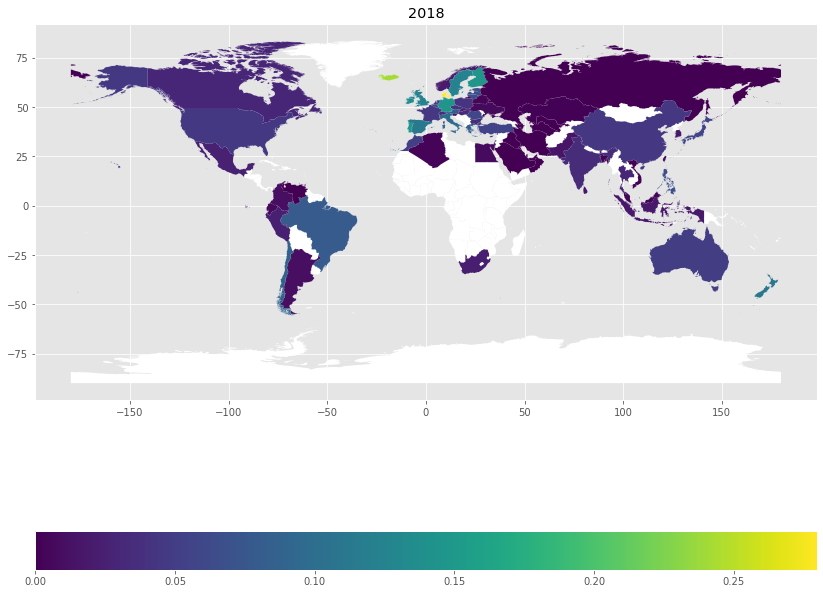

In [33]:
vmin = 0
vmax = .5
# for year in range(1990, 2019):
year = 2018

ax = countries.plot(color='white', figsize=(14, 16))

gpd.GeoDataFrame(df1.loc[df1["year"]==year]).plot(column="renew_ratio", ax=ax, legend=True, 
                                              legend_kwds={'orientation': "horizontal"},
                                              # norm=plt.Normalize(vmin=vmin, vmax=vmax)
                                             )

plt.title(year)
# filepath = os.path.join("output/", str(year)+'.jpg')
# chart = ax.get_figure()
# chart.savefig(filepath, dpi=100)
# ax.clear()

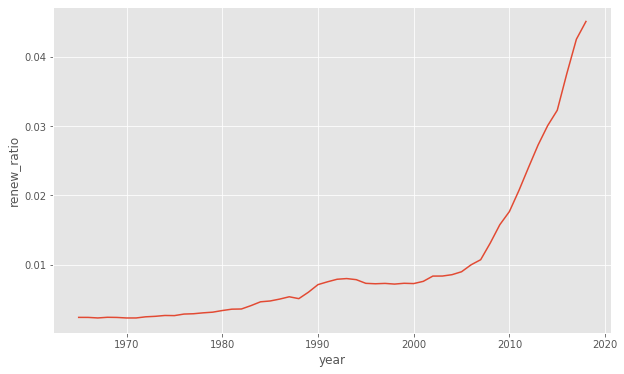

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="renew_ratio", data=df.loc[df["country"] == "United States"])
plt.show()

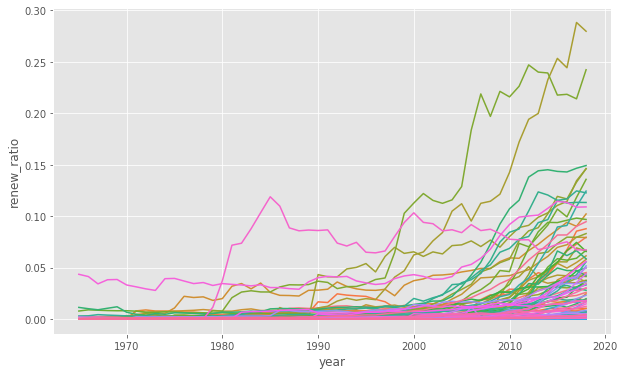

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="renew_ratio", hue="country", data=df, legend=False)
plt.show()

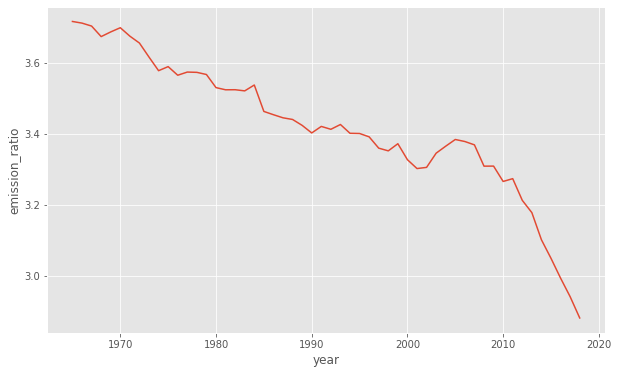

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="emission_ratio", data=df.loc[df["country"] == "China"])
plt.show()

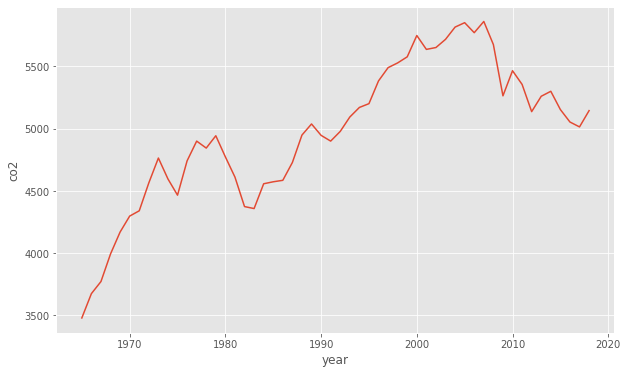

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="co2", data=df.loc[df["country"] == "United States"])
plt.show()

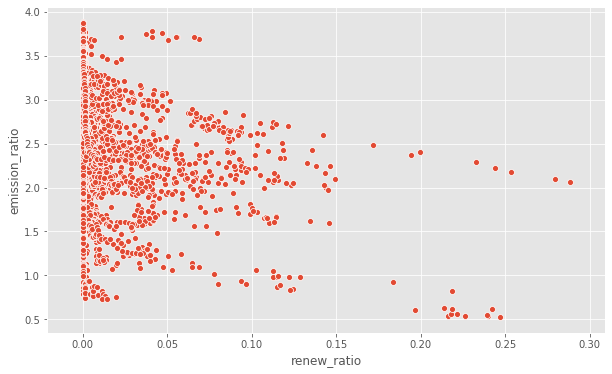

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="renew_ratio", y="emission_ratio", data=df)
plt.show()

In [42]:
df.to_csv("processed.csv", index=False)

## ignore this stuff

In [43]:
df2 = pd.read_csv("../data/AIR_GHG_25112019164912870.csv")
# df2.head()

In [26]:
df2["Country"] = df2["Country"].replace({"United States":"US", "Russia":"USSR", 
                                         "Slovak Republic":"Slovakia", "Korea": "South Korea",
                                         "China (People's Republic of)":"China"
                                        })

In [27]:
df2 = df2.loc[(df2["POL"] == "GHG") & (df2["VAR"] == "TOTAL")]

In [31]:
df3 = energy.merge(df2, left_on=["country", "year"], right_on=["Country", "Year"]).loc[:,["country", "year", "Value", "mtoe", "renewables"]]

In [32]:
df3.head()

,country,year,Value,mtoe,renewables
0,Canada,1990,602184.441,248.959371,0.895126
1,Canada,1991,593402.355,249.176780,0.901914
2,Canada,1992,610440.864,255.459400,1.024133
3,Canada,1993,612264.416,261.004881,1.103782
4,Canada,1994,633675.452,270.622255,1.311050


In [34]:
df3["renew_ratio"] = df3["renewables"] / df3["mtoe"]
df3["emission_ratio"] = df3["Value"]/df3["mtoe"]

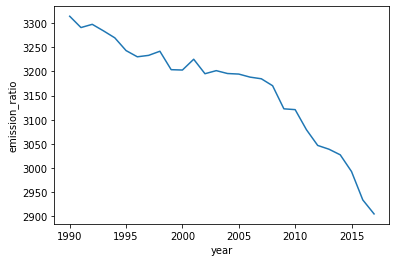

In [40]:
sns.lineplot(x="year", y="emission_ratio", data=df3.loc[df3["country"] == "US"])

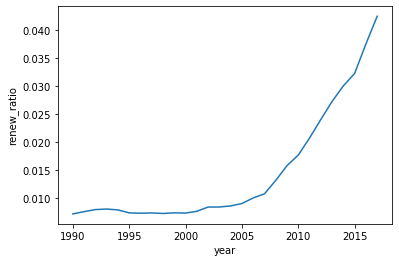

In [41]:
sns.lineplot(x="year", y="renew_ratio", data=df3.loc[df3["country"] == "US"])

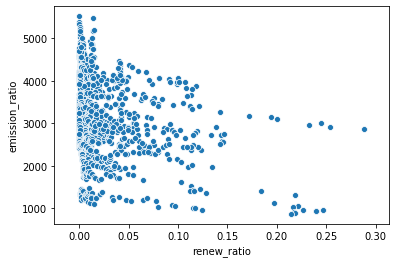

In [38]:
sns.scatterplot(x="renew_ratio", y="emission_ratio", data=df3)